In [24]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from sklearn import datasets
from sklearn.datasets import fetch_openml

In [25]:
mnist = fetch_openml('mnist_784')

In [26]:
data = mnist.data.sample(frac=0.02,random_state=42)
targets = mnist.target.sample(frac=0.02,random_state=42)
X = data.values
y = targets.values

In [27]:
# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

KMeans(n_clusters=10)

In [28]:
# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [29]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

In [30]:
y

['8', '4', '8', '7', '7', ..., '8', '8', '6', '5', '2']
Length: 1400
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

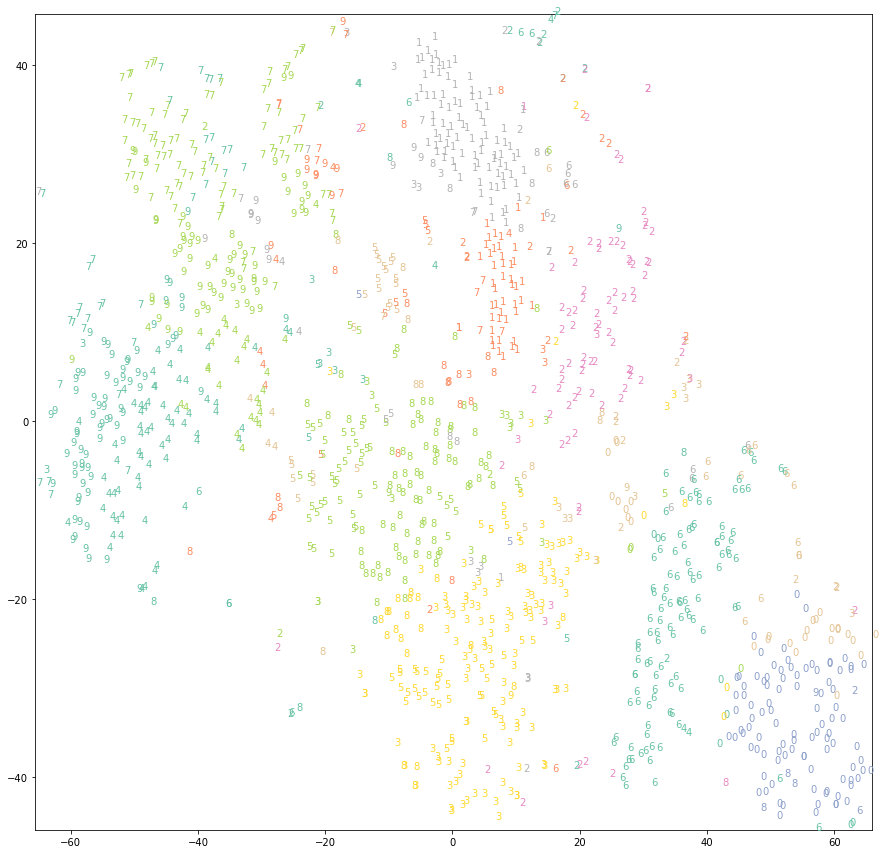

In [31]:
# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure(figsize=(15,15))
for i in range(X.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str('%s' % y[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

In [32]:
# 3. Évaluation
from sklearn import metrics

# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, myclust.labels_))

Silhouette Coefficient: 0.061
Adjusted Rand Index: 0.373
